### **Read Data for Analysis**

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
uber_data=pd.read_csv('uber-raw-data-janjune-15_sample.csv')
uber_data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [96]:
uber_data.shape

(100000, 4)

In [97]:
uber_data.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [98]:
uber_data.duplicated().sum()

54

remove duplicates and update table

In [99]:
uber_data.drop_duplicates(inplace=True)

In [100]:
uber_data.duplicated().sum()

0

In [101]:
uber_data.shape

(99946, 4)

In [102]:
uber_data.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [103]:
uber_data.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [104]:
uber_data['Pickup_date'] = pd.to_datetime(uber_data['Pickup_date'])

In [105]:
type(uber_data['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [106]:
uber_data.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

## **Which month has max uber pickups in New York City**

In [107]:
uber_data['month']=uber_data['Pickup_date'].dt.month_name()

In [108]:
month_count =uber_data['month'].value_counts()

<Axes: xlabel='month'>

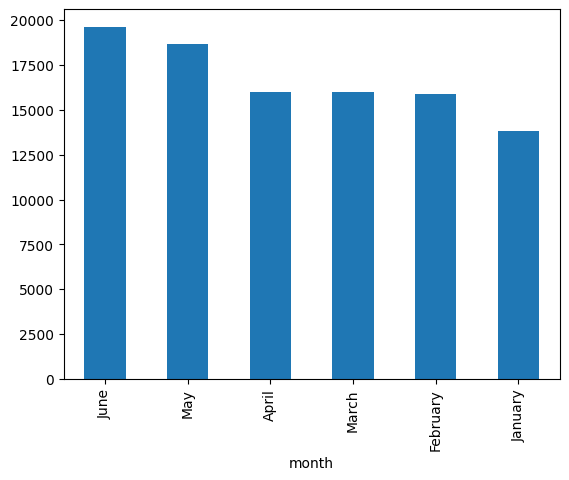

In [109]:
month_count.plot(kind='bar')

### **Conclusion** - June has highest Number of pickups

---



## **What are total pickups on each day for each month**

In [110]:
uber_data['Day']=uber_data['Pickup_date'].dt.day_name()

In [111]:
pivot = pd.crosstab(index=uber_data['month'],columns=uber_data['Day'])

<Axes: xlabel='month'>

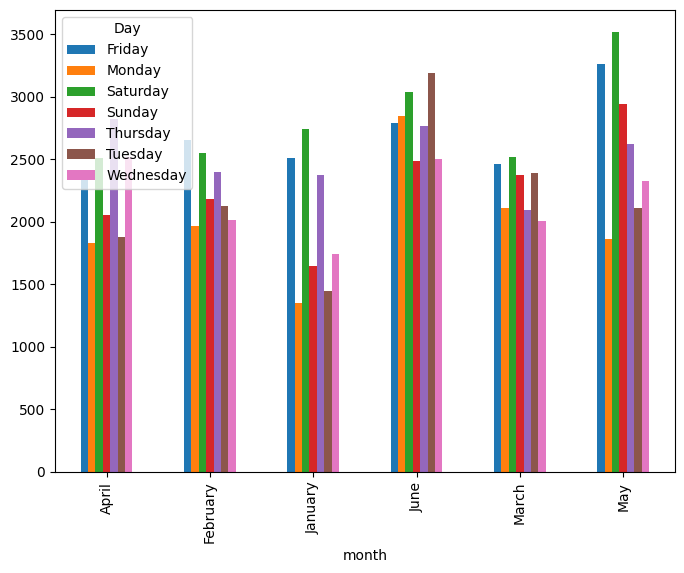

In [112]:
pivot.plot(kind='bar', figsize=(8,6))

## **Find Hourly rush in NewYork City on all days**

In [113]:
uber_data['hour'] = uber_data['Pickup_date'].dt.hour
summary = uber_data.groupby(['Day' , 'hour'] , as_index=False).size()
summary

,Day,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

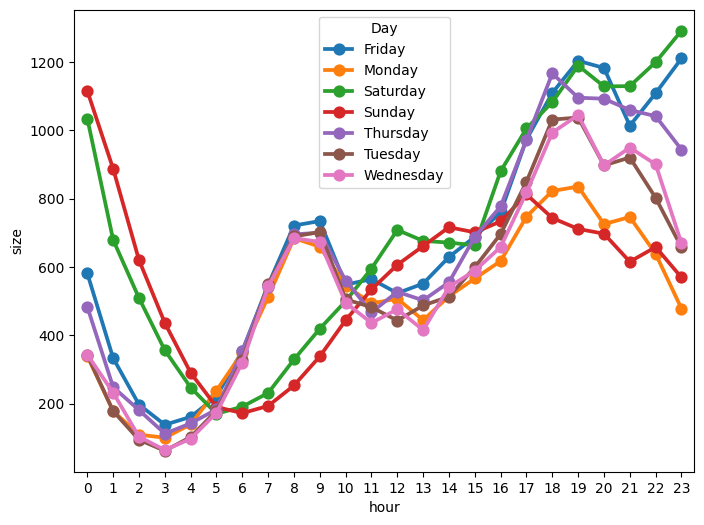

In [114]:
## pointplot between 'hour' & 'size' for all the weekdays..

plt.figure(figsize=(8,6))
sns.pointplot(x="hour" , y="size" , hue="Day" , data=summary)